In [30]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import statsmodels.api as sm
import statsmodels.formula as smf
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import inv
from math import inf

plt.style.use('dark_background')
%matplotlib inline

# Regressions
## 1.Ordinary Least Squares $w_{LS}$

In [31]:
np.random.seed(133)

N = 500
b = [1.75,4]
e = np.random.randn(N)
X = np.random.choice(np.linspace(-3,3,1000),size=N,replace=False)

X = np.column_stack((np.ones(N),X))
y = X@b + e

# plt.scatter(X[:,1],y,s=5);

Residual Error:-8.695266728864226e-13


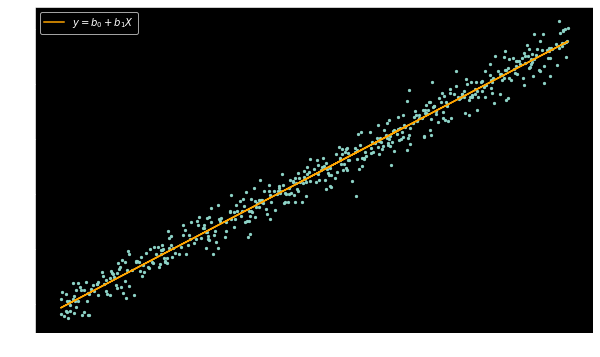

In [32]:
# Ordinary Least Sqares

w_ols = inv(X.T@X)@(X.T@y)
y_ols = X@w_ols
residuals = sum(y_ols-y)

print("Residual Error:{}".format(residuals))
plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5)
plt.plot(X[:,1],y_ols,c='orange',label=r'$y=b_0 + b_1 X$')
plt.legend();

                            OLS Regression Results                            
Dep. Variable:                 y_true   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.373e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:08:35   Log-Likelihood:                -714.62
No. Observations:                 500   AIC:                             1433.
Df Residuals:                     498   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7380      0.045     38.312      0.0

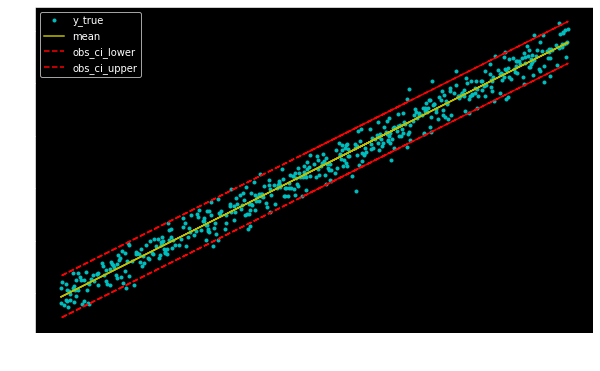

In [33]:
df = pd.DataFrame({'x':X[:,1],'const':X[:,0],'y_true':y})

ols = smf.api.ols(formula="y_true~x",data=df)
res = ols.fit()
print(res.summary())
preds = res.get_prediction().summary_frame()
preds.head()
preds['x']=df.x
preds['y_true'] = df.y_true
preds.plot(x='x', y=['y_true','mean','obs_ci_lower','obs_ci_upper'],style=['c.','y','r--','r--'], figsize=(10,6));

## 2.Ridge Regression $w_{RR}$

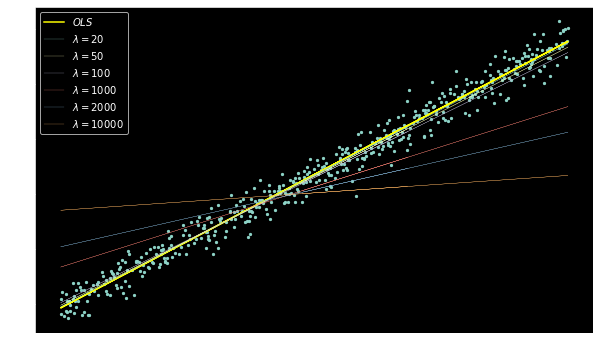

In [34]:
# Ridge Rgression
lam = [20,50,100,1000,2000,10000]

def Ridge(X,y,lam):
    I = np.identity(len(b))
    return inv(lam*I + X.T@X)@(X.T @y)

plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5)
plt.plot(X[:,1],y_ols,c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(X[:,1],y_rr,label=f'$\lambda = {l}$',linewidth=0.25)
plt.legend();

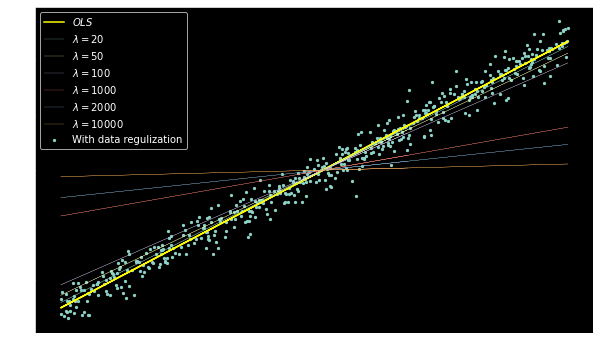

In [35]:
# Rideg regression with Data preprocessing

X[:,1:]= (X[:,1:]-X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)
y = y-y.mean()
y_ls = X@Ridge(X,y,0)

plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5,label='With data regulization')
plt.plot(X[:,1],y_ls,c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(X[:,1],y_rr,label=f'$\lambda = {l}$',linewidth=0.25)
plt.legend();

### non-linear data

In [36]:
np.random.seed(144)

N = 300
b = [1.5,2,-2]
e = np.random.normal(loc=0,scale=2,size=N)

x = np.random.choice(np.linspace(0,5,1000),size=N,replace=False)
X = np.column_stack((np.ones(N),x,np.log(x**2))) 
y = X@b + e


In [37]:
# we add ones to X and X^2 and continue as usual
X[:5]

array([[ 1.        ,  4.11411411,  2.82884706],
       [ 1.        ,  4.21921922,  2.87930018],
       [ 1.        ,  0.36036036, -2.04130149],
       [ 1.        ,  0.94594595, -0.1111397 ],
       [ 1.        ,  2.29229229,  1.65910464]])

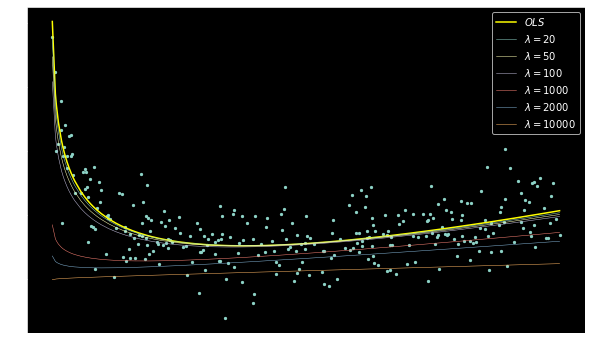

In [38]:

y_ols = X@(inv(X.T@X)@(X.T@y))

# Ridge Rgression
lam = [20,50,100,1000,2000,10000]
s = np.argsort(x)

plt.figure(figsize=(10,6))
plt.scatter(x,y,s=5)
plt.plot(x[s],y_ols[s],c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(x[np.argsort(x)],y_rr[np.argsort(x)],label=f'$\lambda = {l}$',linewidth=0.5)
plt.legend();

In [39]:
m = sm.OLS(y,X) # drop the ones column
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     173.4
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.28e-50
Time:                        13:08:36   Log-Likelihood:                -613.08
No. Observations:                 300   AIC:                             1232.
Df Residuals:                     297   BIC:                             1243.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1337      0.298      3.809      0.000       0.548       1.720
x1             2.1712      0.158     13.726      0.000       1.860       2.482
x2            -2.0606      0.114    -18.029      0.000      -2.286      -1.836
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.208
Skew:                          -0.108   Prob(JB):                        0.547
Kurtosis:                       3.223   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lam = 2
I = np.identity(3)
inv(lam*I + X.T@X)@(X.T@y)

array([ 1.15577888,  2.15021106, -2.04179223])

## 3.Maximum Likelihood $w_{ML}$

The asumption is that $y\sim (Xw|\sigma^2 I)$

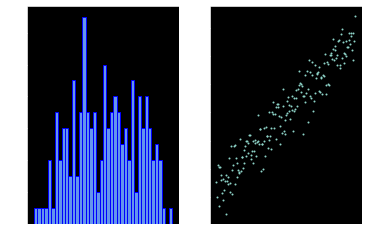

In [41]:
np.random.seed(110)

N = 200
b = [-2,1.75]
e = np.random.normal(size=N)
x = np.linspace(-3,3,N)
X = np.column_stack((np.ones(N),x))
y = X@b + e

# y appears to be normally distributed
fig =plt.figure(num=1)
ax1 = fig.add_subplot(121)
ax1.hist(y,bins=40,color='cornflowerblue',ec='b')
ax2 = fig.add_subplot(122)
ax2.scatter(x,y,s=1);

In [59]:
# bs is a vector that contains the intercept b0 and 
# define the log-likelihood function (minimize the negative = maximize likelihood)
def log_lik(bs,y,X):
    if bs[-1] < 0: return inf
    lik = sp.stats.norm.pdf(y,loc=X@bs[:-1],scale=bs[-1])
    if all(v==0 for v in lik):return inf
    log_lik = np.log(lik[np.nonzero(lik)])
    return -sum(log_lik)

In [43]:
from scipy.optimize import minimize
bs = [1,1,1]
optim = minimize(log_lik,x0=bs,args=(y,X))

/home/ayman/anaconda3/envs/stats/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [44]:
optim

      fun: 276.9550598092645
 hess_inv: array([[ 4.59911739e-03,  4.44040496e-05, -6.37079382e-05],
       [ 4.44040496e-05,  1.66938271e-03,  3.38207176e-06],
       [-6.37079382e-05,  3.38207176e-06,  2.34761813e-03]])
      jac: array([ 7.62939453e-06, -1.52587891e-05,  7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 16
     njev: 26
   status: 2
  success: False
        x: array([-1.98493966,  1.78915505,  0.96641373])

In [45]:
X[:5]

array([[ 1.        , -3.        ],
       [ 1.        , -2.96984925],
       [ 1.        , -2.93969849],
       [ 1.        , -2.90954774],
       [ 1.        , -2.87939698]])

In [46]:
w_ml = optim.x[:-1]
w_rr = Ridge(X,y,20)
w_ls = Ridge(X,y,0)

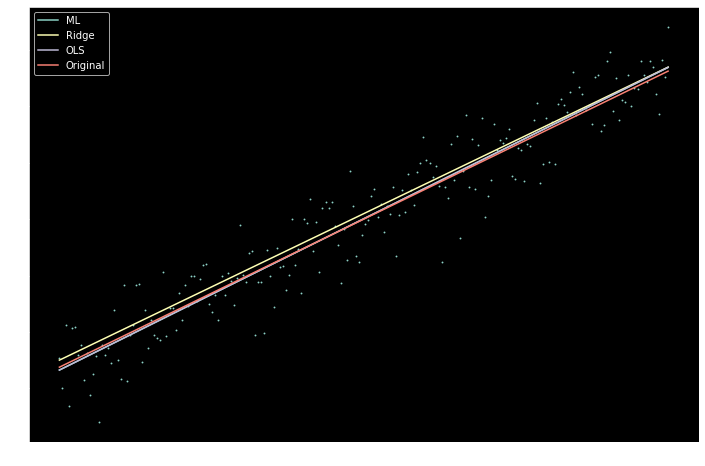

In [47]:
y_ml = X@w_ml
y_rr = X@w_rr
y_ls = X@w_ls

plt.figure(figsize=(12,8))
plt.scatter(x,y,s=0.75)
plt.plot(x,y_ml,label='ML')
plt.plot(x,y_rr,label='Ridge')
plt.plot(x,y_ls,label='OLS')
plt.plot(x,X@b,label='Original')
plt.legend();

In [48]:
print(f'Original:\t\t{b}\nMaximum Likelihood:\t{w_ml}\nRidge Regression:\t{w_rr}\nLeast Squares:\t\t{w_ls}')

Original:		[-2, 1.75]
Maximum Likelihood:	[-1.98493966  1.78915505]
Ridge Regression:	[-1.80449056  1.73199637]
Least Squares:		[-1.98493961  1.78915512]


# 4.Maximum Posterior $w_{MAP}$

We define a distribution on $w_{MAP}$ instead of just one value  

$\mu = (\lambda\sigma^2I+X^TX)^{-1}X^Ty$  
$\Sigma = (\lambda I +\sigma^{-2}X^TX)^{-1}$

In [49]:
def MAP_regression(X,y,lam,sigma2):
    I = np.identity(X.shape[1])
    mu = inv(lam*sigma2*I + X.T@X)@X.T@y
    S = inv(lam*I+1/sigma2 * X.T@X)
    return mu,S

In [50]:
np.random.seed(99)

N = 200
X = np.random.randn(N,3)
b = [1.5,2.25,-3.1]
epsilon = np.random.normal(loc=0,scale=2,size=N)
y = X@b + epsilon

sigma2 =2
lam = 0.1

In [51]:
mu, S = MAP_regression(X,y,2,0.1);mu,S

(array([ 1.54923578,  2.40003908, -3.07250102]),
 array([[ 4.18785247e-04,  8.87148916e-06,  3.18230522e-06],
        [ 8.87148916e-06,  5.61537021e-04, -5.12664342e-06],
        [ 3.18230522e-06, -5.12664342e-06,  5.98769868e-04]]))

To predict a value $y_0$ given $x_0$ we actually predict a distribution of possible values $\mu_0$ and $\sigma^2_0$ of each prediction:    
$\mu_0 = x^T_0\mu$  
$\sigma^2_0 = \sigma^2 + x^T_0\Sigma x_0$

In [52]:
mu_0 = X[0].T@mu
sigma2_0 = sigma2 + X[0].T@S@X[0]

In [53]:
sigma2_0,mu_0

(2.0024216181970114, 3.8465425585587907)

(0.0, 0.21)

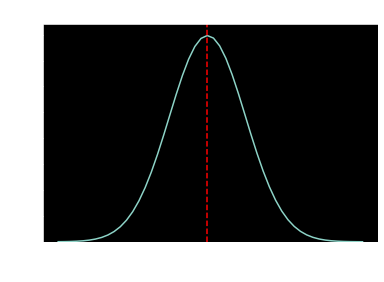

In [54]:
a = np.linspace(-4,12,50)
e = sp.stats.norm.pdf(a,loc=mu_0,scale=sigma2_0)

plt.plot(a,e)
plt.plot(np.ones(50)*mu_0,np.linspace(0,0.21,50),c='r',linestyle='dashed')
plt.xlabel(r'$y_0$')
plt.title("Probability Distribution of $y_0$ given $x_0, \mu & \Sigma$")
plt.ylim(0,0.21)

# 5. Minimum $l_2$ Regression

We use it if the number of features d is bigger than the number of samples n

# 6. LASSO Regression:

The same as Ridge regression in term of regularizing regression by penalizing w.  
In ridge we multiplied $\lambda.Slope^2$  
in LASSO we multiply $\lambda |Slope|$  

Sklean uses alpah for $\lambda$

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lr = Lasso(alpha=0.1)
lr.fit(X,y)

Lasso(alpha=0.1)

In [57]:
lr.score(X,y)

0.7902128374216056

In [58]:
mu,b

(array([ 1.54923578,  2.40003908, -3.07250102]), [1.5, 2.25, -3.1])